In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [2]:
df = pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.drop(columns = ['species']).values
y = df['species'].values

In [4]:
def apply_pca(X, n_components=2):
    mean_vector = np.mean(X, axis = 0)
    Z = X - mean_vector
    covariance_matrix = (1/(Z.shape[0]-1))*(Z.T@Z)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    fin_proj = Z@eigenvectors[:,:2]
    return fin_proj

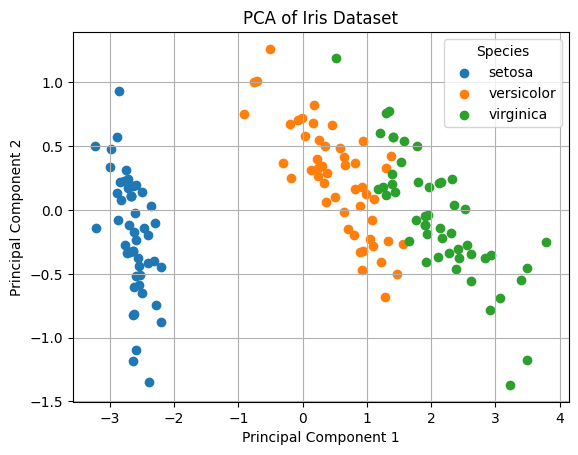

In [5]:
fin_proj = apply_pca(X, 2)
for species in np.unique(y):
    plt.scatter(
        fin_proj[y == species, 0],  # PC1
        fin_proj[y == species, 1],  # PC2
        label=species
    )
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()

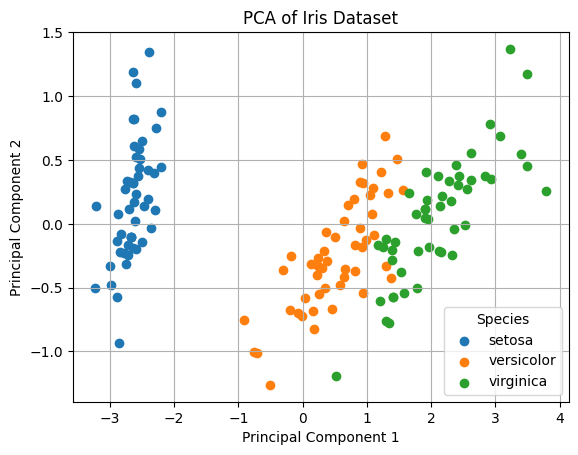

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
fin_proj = pca.transform(X)
for species in np.unique(y):
    plt.scatter(
        fin_proj[y == species, 0],  # PC1
        fin_proj[y == species, 1],  # PC2
        label=species
    )
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()

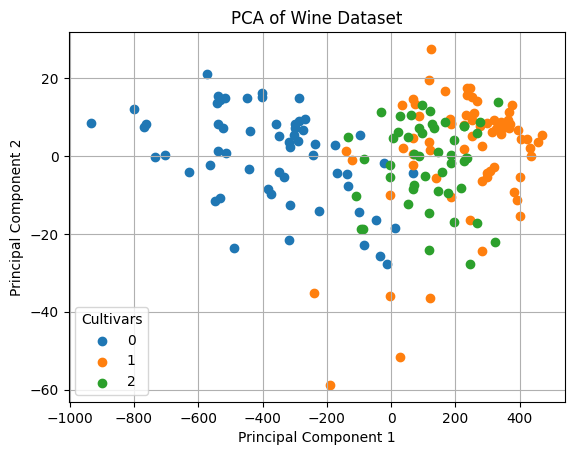

In [7]:
from sklearn.datasets import load_wine, load_breast_cancer, fetch_openml
wine = load_wine()
X = wine.data
y = wine.target
fin_proj = apply_pca(X, 2)
for species in np.unique(y):
    plt.scatter(
        fin_proj[y == species, 0],  # PC1
        fin_proj[y == species, 1],  # PC2
        label=species
    )
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cultivars')
plt.grid(True)
plt.show()

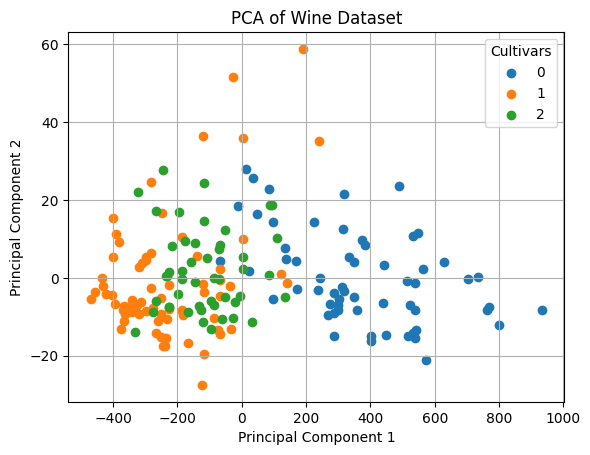

In [8]:
pca = PCA(n_components = 2)
pca.fit(X)
fin_proj = pca.transform(X)
for species in np.unique(y):
    plt.scatter(
        fin_proj[y == species, 0],  # PC1
        fin_proj[y == species, 1],  # PC2
        label=species
    )
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cultivars')
plt.grid(True)
plt.show()

In [9]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

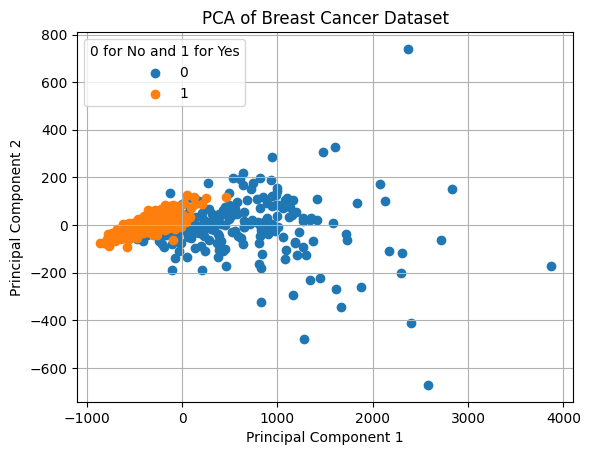

In [10]:
fin_proj = apply_pca(X, 2)
for species in np.unique(y):
    plt.scatter(
        fin_proj[y == species, 0],  # PC1
        fin_proj[y == species, 1],  # PC2
        label=species
    )
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='0 for No and 1 for Yes')
plt.grid(True)
plt.show()

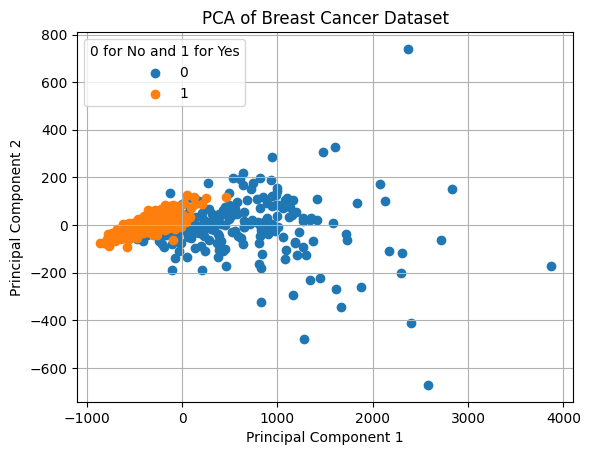

In [11]:
pca = PCA(n_components = 2)
pca.fit(X)
fin_proj = pca.transform(X)
for species in np.unique(y):
    plt.scatter(
        fin_proj[y == species, 0],  # PC1
        fin_proj[y == species, 1],  # PC2
        label=species
    )
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='0 for No and 1 for Yes')
plt.grid(True)
plt.show()

In [12]:
fashion = fetch_openml('fashion-mnist')
X = fashion.data
y = fashion.target
fin_proj = apply_pca(X, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
